In [1]:
import scanpy as sc
import os
import pandas as pd
import pickle as pkl
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.5.1 anndata==0.7.3 umap==0.4.3 numpy==1.18.1 scipy==1.4.1 pandas==1.0.3 scikit-learn==0.22.1 statsmodels==0.11.1


/home/sliang3/miniconda3/envs/scanpy/lib/python3.8/site-packages/umap/spectral.py:4: NumbaDeprecationWarning: No direct replacement for 'numba.targets' available. Visit https://gitter.im/numba/numba-dev to request help. Thanks!
  import numba.targets


# Read Data

Read data using loom

In [4]:
# adata = sc.read_loom("../data/PDAC/scRNA_fna_SeuratObject_ALL.loom")

/home/sliang3/miniconda3/envs/scanpy/lib/python3.8/site-packages/loompy/loom_validator.py:48: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  with h5py.File(path) as f:


In [58]:
# with open("../data/PDAC/scRNA_fna_SeuratObject_ALL.pkl", 'wb') as file:
#     pkl.dump(obj=adata, file=file)

In [ ]:
with open("../data/PDAC/scRNA_fna_SeuratObject_ALL.pkl", 'rb') as file:
    adata = pkl.load(file)

In [7]:
adata

AnnData object with n_obs × n_vars = 31720 × 24422
    obs: 'ClusterID', 'ClusterName', 'G2M_Score', 'Phase', 'S_Score', 'cell_type', 'integrated_snn_res_0_5', 'nCount_RNA', 'nFeature_RNA', 'orig_ident', 'percent_mt', 'seurat_clusters', 'stage'
    var: 'Selected', 'vst_mean', 'vst_variable', 'vst_variance', 'vst_variance_expected', 'vst_variance_standardized'
    layers: 'norm_data'

In [10]:
adata.obs

,ClusterID,ClusterName,G2M_Score,Phase,S_Score,cell_type,integrated_snn_res_0_5,nCount_RNA,nFeature_RNA,orig_ident,percent_mt,seurat_clusters,stage
AAACCTGGTTCCCTTG_1,3,Myeloid,-0.139026,G1,-0.102319,Myeloid,8,7110.0,2112,P1,4.289733,8,Primary
AAACGGGCAATCCGAT_1,3,Myeloid,0.005527,G2M,-0.019100,Myeloid,11,862.0,436,P1,29.118330,11,Primary
AAACGGGTCGAATCCA_1,2,T,0.014605,G2M,-0.015689,T,3,919.0,484,P1,7.508161,3,Primary
AAAGATGTCCACTCCA_1,2,T,-0.022346,S,0.006563,T,3,1432.0,706,P1,7.262570,3,Primary
AAAGATGTCTGCGTAA_1,2,T,-0.025140,S,0.003153,T,0,1675.0,686,P1,4.059701,0,Primary
...,...,...,...,...,...,...,...,...,...,...,...,...,...
attagtatagcgcgttat_9,1,Epithelial,-0.015158,G1,-0.012173,Epithelial,6,449.0,269,PM,0.000000,6,Metastasis
ccacgcgtacagaccttc_9,1,Epithelial,0.001490,S,0.081848,Epithelial,6,448.0,272,PM,0.000000,6,Metastasis
gctcccagtaaaggtagg_9,1,Epithelial,-0.011416,G1,-0.010956,Epithelial,5,446.0,293,PM,0.000000,5,Metastasis
tgaatttgcggtgtacag_9,1,Epithelial,-0.031338,G1,-0.006695,Epithelial,2,446.0,291,PM,0.000000,2,Metastasis


# B, T, and NK cells

In [16]:
lymphocytes = adata[adata.obs.ClusterName.isin(['T', 'B', 'NK'])]
lymphocytes

View of AnnData object with n_obs × n_vars = 11868 × 24422
    obs: 'ClusterID', 'ClusterName', 'G2M_Score', 'Phase', 'S_Score', 'cell_type', 'integrated_snn_res_0_5', 'nCount_RNA', 'nFeature_RNA', 'orig_ident', 'percent_mt', 'seurat_clusters', 'stage'
    var: 'Selected', 'vst_mean', 'vst_variable', 'vst_variance', 'vst_variance_expected', 'vst_variance_standardized'
    layers: 'norm_data'

normalizing counts per cell
    finished (0:00:00)


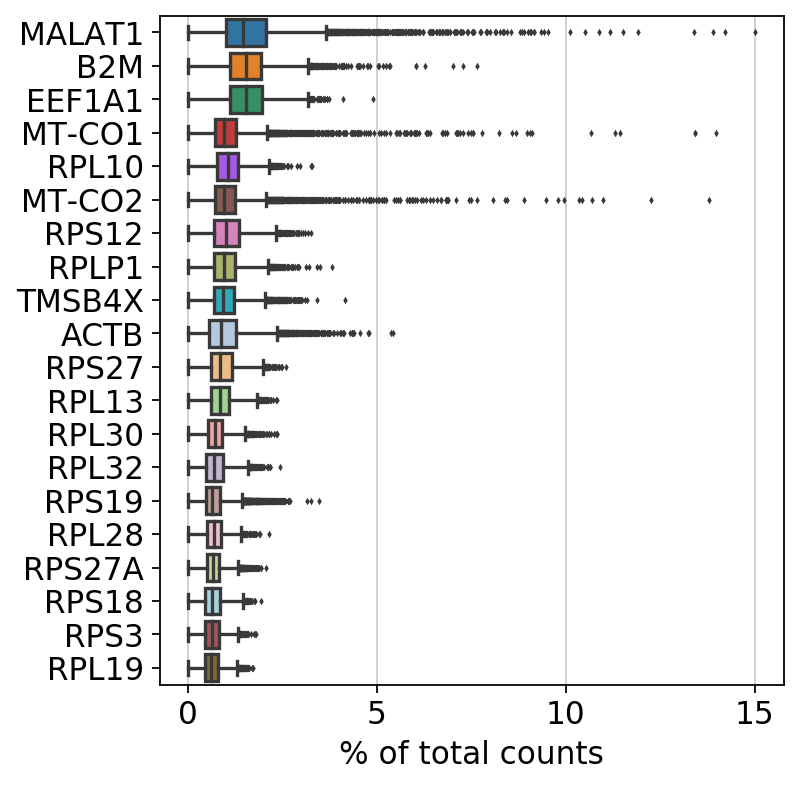

In [18]:
sc.pl.highest_expr_genes(lymphocytes, n_top=20)

In [19]:
sc.pp.filter_cells(lymphocytes, min_genes=200)
sc.pp.filter_genes(lymphocytes, min_cells=3)

filtered out 6467 genes that are detected in less than 3 cells


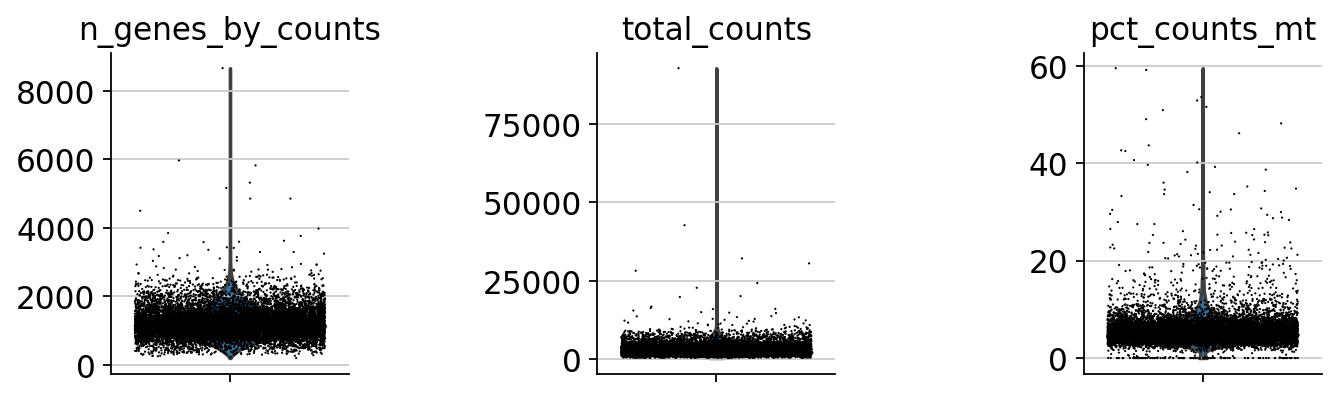

In [36]:
lymphocytes.var['mt'] = lymphocytes.var.index.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(lymphocytes, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
sc.pl.violin(lymphocytes, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'], jitter=0.4, multi_panel=True)

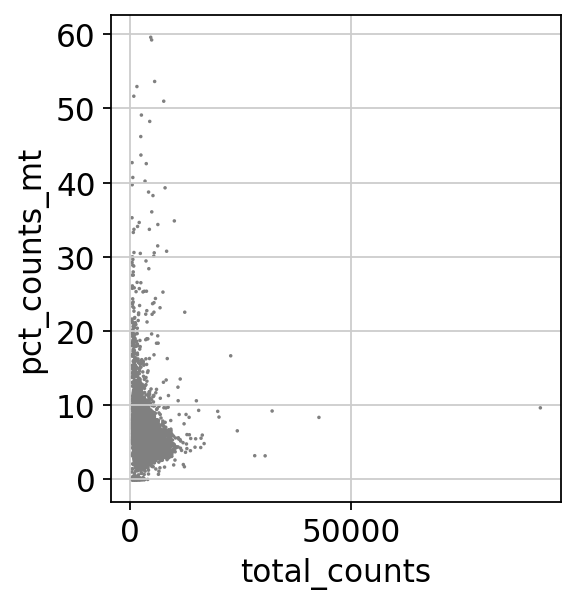

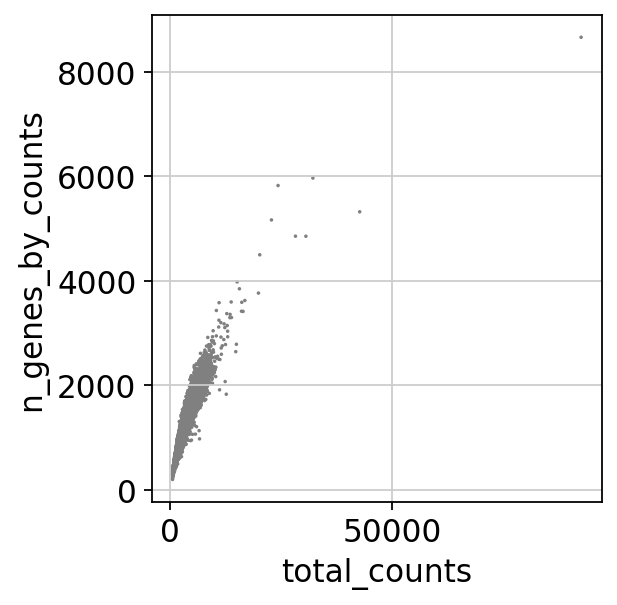

In [37]:
sc.pl.scatter(lymphocytes, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(lymphocytes, x='total_counts', y='n_genes_by_counts')

In [39]:
lymphocytes = lymphocytes[(lymphocytes.obs.pct_counts_mt < 20) & (lymphocytes.obs.n_genes_by_counts < 4000) , :]
lymphocytes

View of AnnData object with n_obs × n_vars = 11770 × 17955
    obs: 'ClusterID', 'ClusterName', 'G2M_Score', 'Phase', 'S_Score', 'cell_type', 'integrated_snn_res_0_5', 'nCount_RNA', 'nFeature_RNA', 'orig_ident', 'percent_mt', 'seurat_clusters', 'stage', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'Selected', 'vst_mean', 'vst_variable', 'vst_variance', 'vst_variance_expected', 'vst_variance_standardized', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    layers: 'norm_data'

In [40]:
sc.pp.normalize_total(lymphocytes, target_sum=1e4)
sc.pp.log1p(lymphocytes)
sc.pp.scale(lymphocytes, max_value=10)

/home/sliang3/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:138: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


normalizing counts per cell
    finished (0:00:00)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


extracting highly variable genes
    finished (0:00:03)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


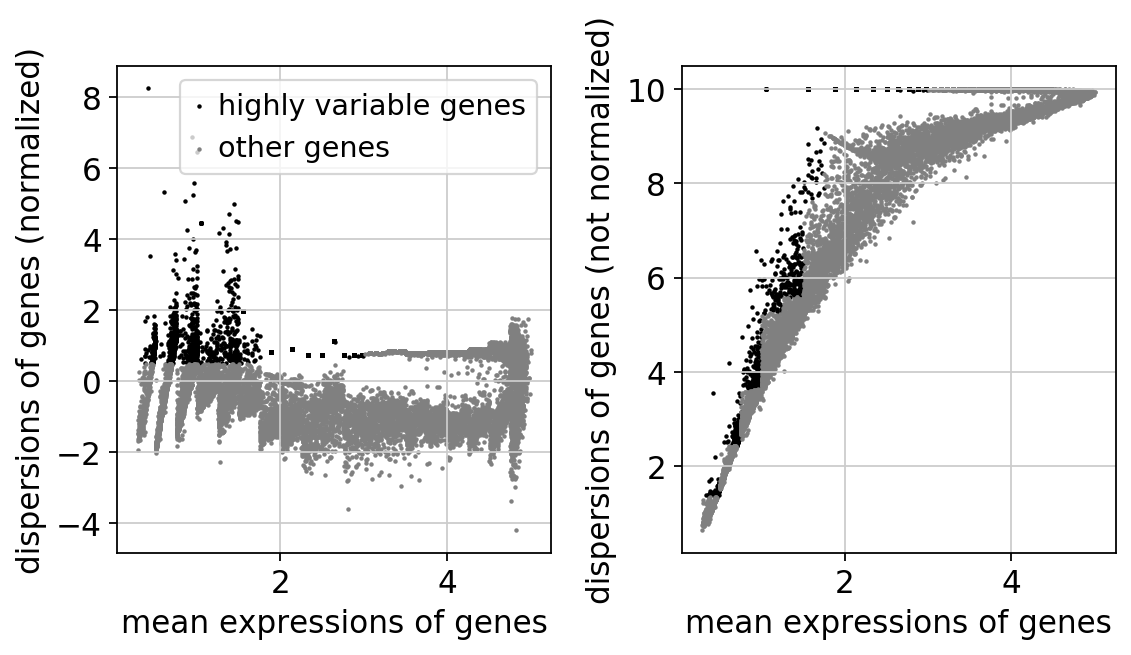

In [43]:
sc.pp.highly_variable_genes(lymphocytes, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(lymphocytes)

In [44]:
lymphocytes.raw = lymphocytes
lymphocytes = lymphocytes[:, lymphocytes.var.highly_variable]
lymphocytes

View of AnnData object with n_obs × n_vars = 11770 × 4071
    obs: 'ClusterID', 'ClusterName', 'G2M_Score', 'Phase', 'S_Score', 'cell_type', 'integrated_snn_res_0_5', 'nCount_RNA', 'nFeature_RNA', 'orig_ident', 'percent_mt', 'seurat_clusters', 'stage', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'Selected', 'vst_mean', 'vst_variable', 'vst_variance', 'vst_variance_expected', 'vst_variance_standardized', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mean', 'std', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p'
    layers: 'norm_data'

# Dimensional Reduction

## PCA

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:05)


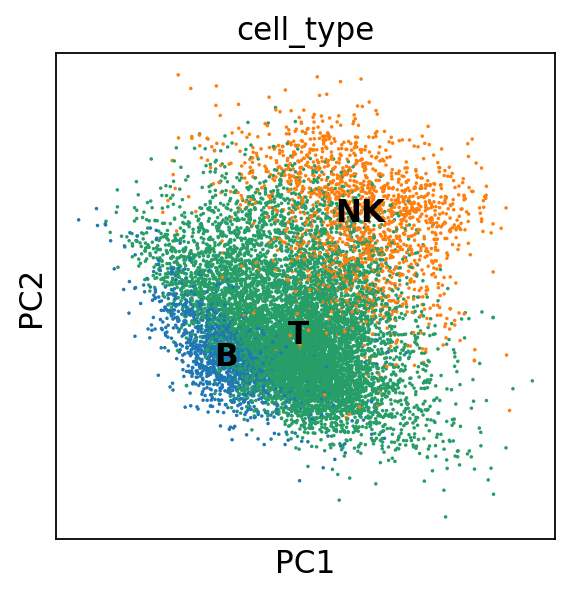

In [46]:
sc.tl.pca(lymphocytes, svd_solver='arpack')
sc.pl.pca(lymphocytes, color='cell_type', legend_loc='on data')

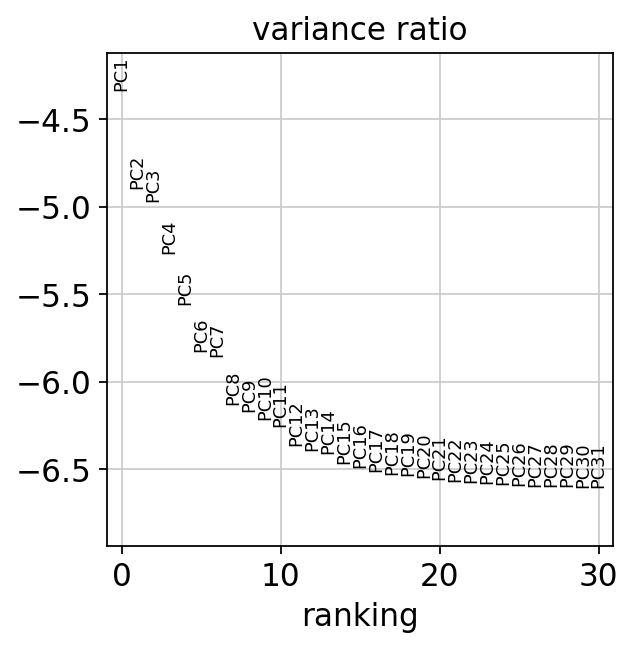

In [48]:
sc.pl.pca_variance_ratio(lymphocytes, log=True)

ranking genes


/home/sliang3/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  rankings_gene_logfoldchanges.append(np.log2(foldchanges[global_indices]))


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:22)


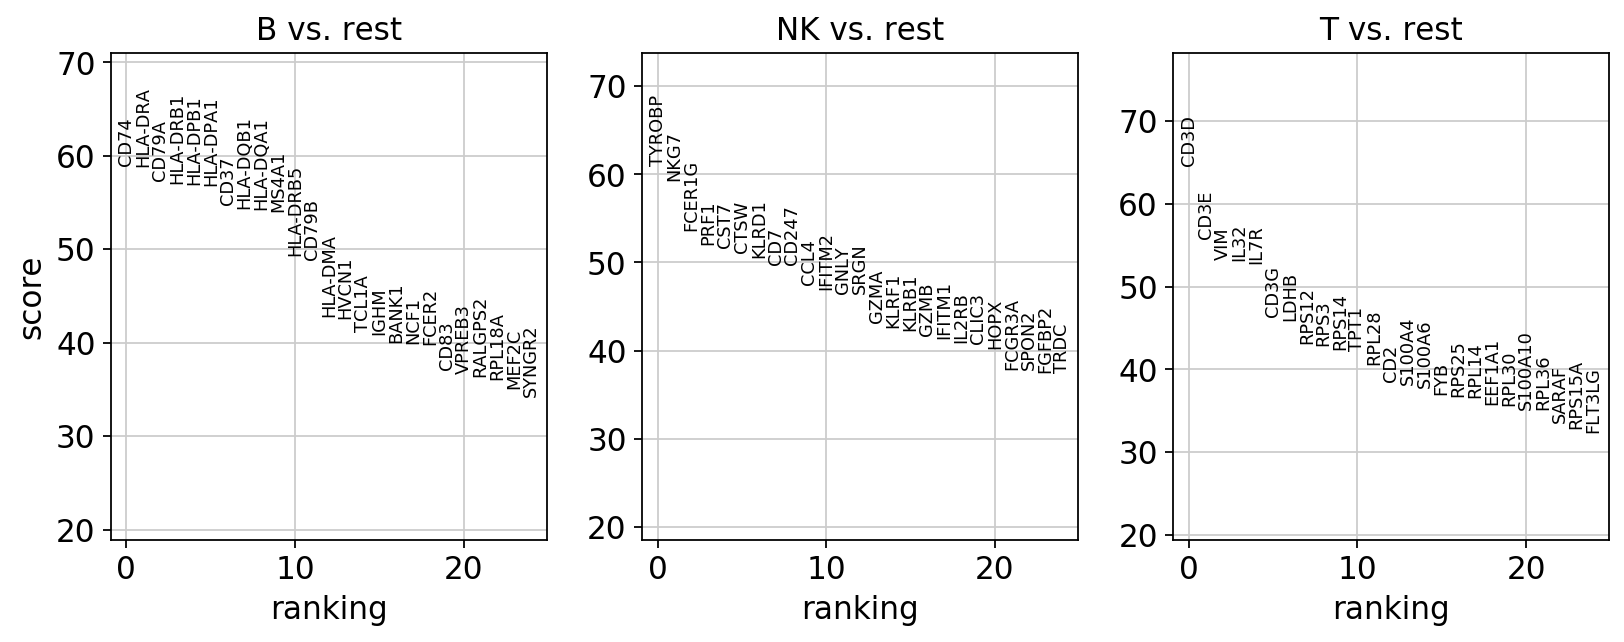

In [51]:
sc.tl.rank_genes_groups(lymphocytes, 'cell_type', method='wilcoxon')
sc.pl.rank_genes_groups(lymphocytes, n_genes=25, sharey=False)

## UMAP

In [52]:
sc.pp.neighbors(lymphocytes)

computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:10)


In [53]:
sc.tl.umap(lymphocytes)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:09)


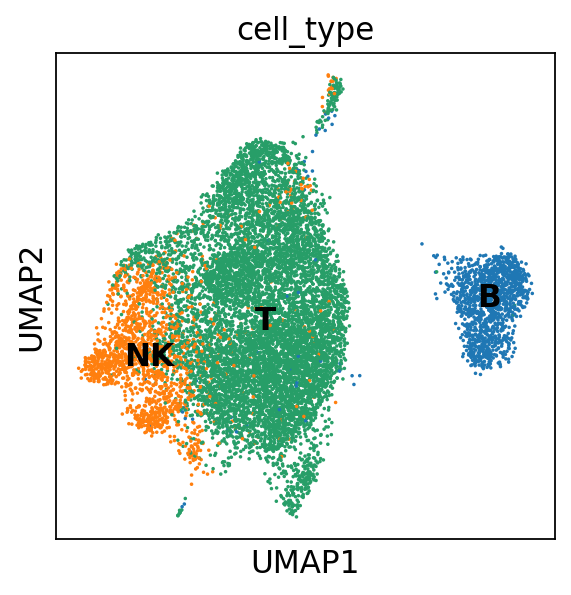

In [54]:
sc.pl.umap(lymphocytes, color='cell_type', legend_loc='on data')

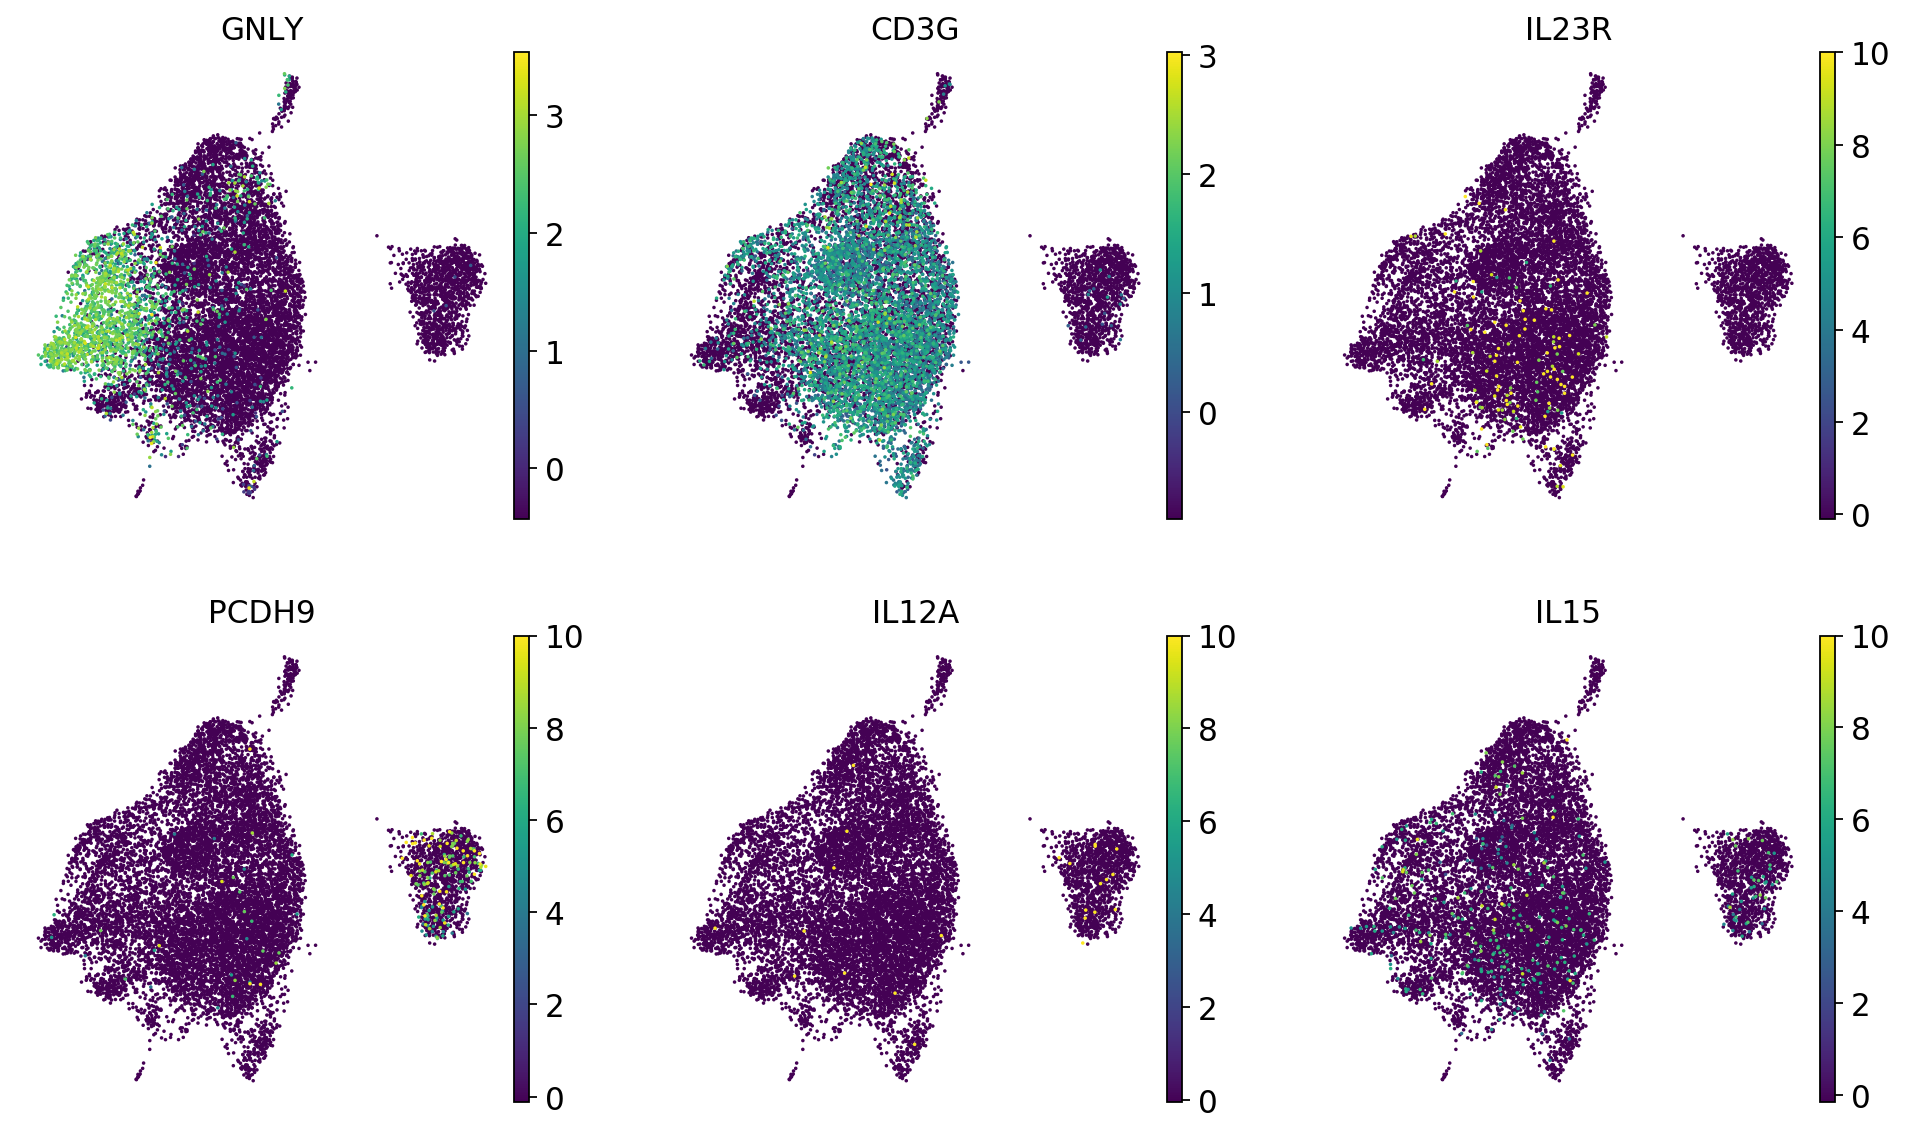

In [63]:
markers = ["GNLY", "CD3G", "IL23R", "PCDH9", 'IL12A', "IL15"]
sc.pl.umap(lymphocytes.raw.to_adata(), color=markers, legend_loc='on data', frameon=False, ncols=3)

In [70]:
il23r = lymphocytes.raw[:, 'IL23R'].X > 0
pcdh9 = lymphocytes.raw[:, 'PCDH9'].X > 0

contingency_table = pd.DataFrame([[(~il23r & ~pcdh9).sum(), il23r.sum()], [pcdh9.sum(), (il23r & pcdh9).sum()]],
                                 index=['PCDH9-', 'PCDH9+'],
                                 columns=["IL23R-", "IL23R+"])
display(contingency_table)
chi2, p, dof, ex = scipy.stats.chi2_contingency(contingency_table)
print(f"χ² = {chi2:.2f}, p = {p:.2e}")

,IL23R-,IL23R+
PCDH9-,11486,113
PCDH9+,175,4


χ² = 1.71, p = 1.91e-01
